# Homework 1: Mean Sea Level Time Series Analysis

In [6]:
# Load all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import pastas as ps
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.filters.hp_filter import hpfilter

%matplotlib inline

import seaborn as sns
from plotly import graph_objects as go
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels
from pandas.plotting import autocorrelation_plot

import requests
import json
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

from datetime import datetime

In [7]:
# Import the time series data
data = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=0, 
                               index_col=0,
                               parse_dates=True)

In [8]:
# Check the data
data.head()

,sea_level
time,
1878.0416,6892
1878.1250,6974
1878.2084,6974
1878.2916,6998
1878.3750,7020


In [9]:
data.columns

Index(['sea_level'], dtype='object')

In [13]:
# Plot the time series data

df = pd.read_excel("Sea level data/Mumbai_India.xlsx", 
                               header=0,
                               parse_dates=True)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df.time, 
    y=df.sea_level, 
    line_color='deepskyblue'))

fig.update_layout(
    template = "plotly_white",
    title_text="Mean Sea Level Time Series",
    xaxis_rangeslider_visible=True)

fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="Mean Sea Level (mm)")

fig.show()

In [14]:
# Summary of the data
data['sea_level'].describe()

count    1392.000000
mean     7013.291667
std        63.506112
min      6831.000000
25%      6971.000000
50%      7016.000000
75%      7056.000000
max      7216.000000
Name: sea_level, dtype: float64

In [16]:
# OLS trend fit

fig = px.scatter(df, x="time", y="sea_level", trendline="ols", color='sea_level',
                labels={
                     "time": "Time",
                     "sea_level": "Sea Level (mm)",
                 },
                title="Ordinary Least Square (OLS) Trend Fit")
fig.show()

In [17]:
# Summary of the OLS fit
results = px.get_trendline_results(fig)
print(results)

results.px_fit_results.iloc[0].summary()

                                      px_fit_results
0  <statsmodels.regression.linear_model.Regressio...


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     204.6
Date:                Thu, 17 Sep 2020   Prob (F-statistic):           2.15e-43
Time:                        15:51:46   Log-Likelihood:                -7657.5
No. Observations:                1392   AIC:                         1.532e+04
Df Residuals:                    1390   BIC:                         1.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5698.6801     91.926     61.992      0.000    5518.351    5879.010
x1             0.6790      0.047     14.303      0.000       0.586       0.772
==============================================================================
Omnibus:                        2.627   Durbin-Watson:                   1.379
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.609
Skew:                          -0.075   Prob(JB):                        0.271
Kurtosis:                       2.851   Cond. No.                     1.12e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Trend in the time series

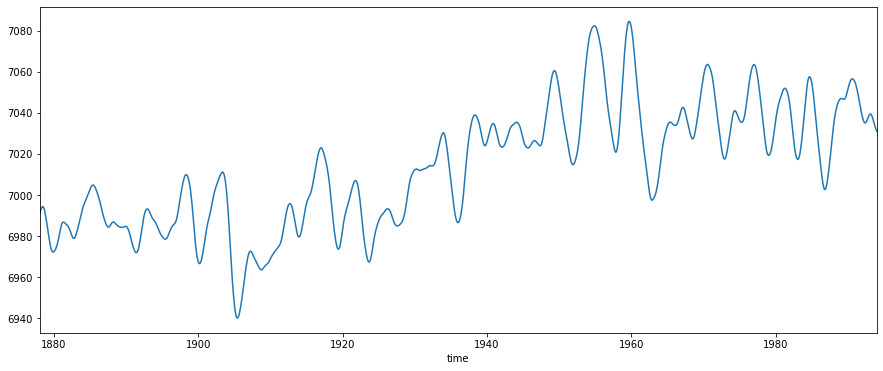

In [18]:
sea_level_cycle, sea_level_trend = hpfilter(data['sea_level'], lamb=1600)

sea_level_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)